## SET UP THE ENVIRONMENT 

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [136]:
# Load the data
df_raw = pd.read_csv('ypedia_homepage_search_sample.csv')

### STARTER ANALYSIS

In [137]:
df_raw.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [138]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null   object 
 13  srch_co                    998

In [139]:
df_raw=df_raw.rename(columns={'Unnamed: 0':'searchNo'})

##### Features Information
The YPedia homepage search data consists of 25 features.
| Attribute ID | Attribute Name | Attribute Type | Attribute Description |
|:------------:|:-------------- |:---------------|:----------------------|
|1| searchNo | Numeric | Number assigned to each search |
|2| date_time | Date | Timestamp of the user's activity |
|3| site_name | Numeric | Identifier for the site (platform or domain) where the search occurred |
|4| posa_continent | Numeric | The continent code of the point of sale (the location where the transaction is made) |
|5| user_location_country | Numeric | The country code of the user's location |
|6| user_location_region | Numeric | The region code of the user's location | 
|7| user_location_city | Numeric | The city code of the user's location |
|8| orig_destination_distance | Numeric | The distance from the user's home to the destination of interest |
|9| user_id | Numeric | Unique identifier for each user |
|10| is_mobile | Numeric | A binary indicator whether the search was done via a mobile device |
|11| is_package | Numeric | A binary indicator whether the search included a package (e.g., flight + hotel) |
|12| channel  | Numeric | The marketing channel through which the user accessed the site |
|13| srch_ci  | Date | Check-in date searched |
|14| srch_co | Date | Check-out date searched |
|15| srch_adults_cnt  | Numeric | Number of adults included in the search |
|16| srch_children_cnt | Numeric | Number of children included in the search | 
|17| srch_rm_cnt | Numeric | Number of rooms requested |
|18| srch_destination_id | Numeric | Identifier for the destination where the user wants to stay |
|19| srch_destination_type_id | Numeric | Type of destination |
|20| is_booking | Numeric | A binary indicator whether the search led to a booking |
|21| cnt  | Numeric | Number of similar queries made by the user in that session |
|22| hotel_continent | Numeric | Continent code of the hotel |
|23| hotel_country | Numeric | Country code of the hotel |
|24| hotel_market | Numeric | Market code for the hotel |
|25| hotel_cluster | Numeric | A categorization of hotels to help in predictions (e.g., groups of similar hotels) |

## DATA CLEANING

Some of the features are not useful for our analysis. We'll drop them.

The features set for this project are as follows:

- User: user_id

- Content: date_time, srch_ci, srch_co, srch_adults_cnt, srch_children_cnt, srch_room_cnt, orig_destination_distance

- Method: is_mobile, is_package, is_booking, channel

In [140]:
columns_to_keep = [
    'user_id',  # User
    'date_time', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'orig_destination_distance',  # Content
    'is_mobile', 'is_package', 'is_booking', 'channel'  # Method
]

# Dropping all columns that are not in the 'columns_to_keep'
df_raw = df_raw[columns_to_keep]

#### Missing Values

In [141]:
df_raw.isnull().sum() 

user_id                          0
date_time                        0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
orig_destination_distance    36085
is_mobile                        0
is_package                       0
is_booking                       0
channel                          0
dtype: int64

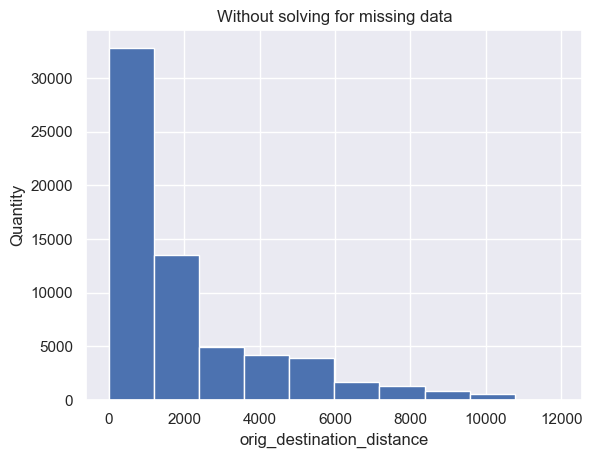

count    63915.000000
mean      1960.661721
std       2228.153377
min          0.005600
25%        312.792100
50%       1131.835300
75%       2542.359350
max      11965.376100
Name: orig_destination_distance, dtype: float64

In [142]:
df_raw['orig_destination_distance'].hist()
plt.xlabel('orig_destination_distance')
plt.ylabel('Quantity')
plt.title('Without solving for missing data')
plt.show()
df_raw['orig_destination_distance'].describe()

There are a lot of data points missing for this feature (~36%). As we can see, mean of distance(1960) is larger than median(1131), which means that the distribution of distance is skewed. It makes sense to impute the mean of this data to the missing values, so as to minimize the difference between the mean and the median.

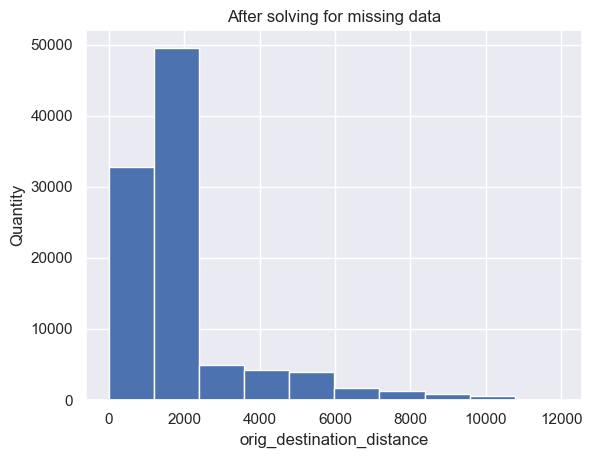

count    100000.000000
mean       1960.661721
std        1781.333573
min           0.005600
25%         745.574000
50%        1960.661721
75%        1960.661721
max       11965.376100
Name: orig_destination_distance, dtype: float64

In [143]:
df_raw['orig_destination_distance']=df_raw['orig_destination_distance'].fillna(df_raw['orig_destination_distance'].mean())
df_raw['orig_destination_distance'].hist()
plt.xlabel('orig_destination_distance')
plt.ylabel('Quantity')
plt.title('After solving for missing data')
plt.show()
df_raw['orig_destination_distance'].describe()

In [144]:
sum(df_raw.duplicated()) # Check duplicated values

0

In [145]:
df = df_raw.copy()

## EDA

##### Distribution of Numerical Columns

In [146]:
df.describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
user_id,100000.0,605438.332130,351615.377136,14.0000,11108.900000,118846.90000,298796.250,602882.500000,915722.250000,1.090575e+06,1.150497e+06,1.188432e+06,1.198783e+06
srch_adults_cnt,100000.0,2.020710,0.909774,0.0000,1.000000,1.00000,2.000,2.000000,2.000000,3.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00
srch_children_cnt,100000.0,0.336750,0.734449,0.0000,0.000000,0.00000,0.000,0.000000,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,9.000000e+00
srch_rm_cnt,100000.0,1.111750,0.451602,0.0000,1.000000,1.00000,1.000,1.000000,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00
orig_destination_distance,100000.0,1960.661721,1781.333573,0.0056,3.967163,169.43166,745.574,1960.661721,1960.661721,4.328430e+03,5.787798e+03,8.910715e+03,1.196538e+04
is_mobile,100000.0,0.133770,0.340407,0.0000,0.000000,0.00000,0.000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
is_package,100000.0,0.248140,0.431936,0.0000,0.000000,0.00000,0.000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
is_booking,100000.0,0.079930,0.271186,0.0000,0.000000,0.00000,0.000,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
channel,100000.0,5.858590,3.722823,0.0000,0.000000,0.00000,2.000,9.000000,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,1.000000e+01


##### Min Max Dates

In [147]:
print("Min Date is: ", df.date_time.min())
print("Max Date is: ", df.date_time.max())

Min Date is:  2013-01-07 00:33:47
Max Date is:  2014-12-31 23:47:14


#### Unique Values

In [148]:
# Check unique values of each column in the dataset using a for loop
for column in df.columns:
                print('Unique values of variable',column,':',len(df[column].unique()),'\t',list(df[column].unique())[0:10])
                print("="*80) 

Unique values of variable user_id : 88863 	 [792280, 961995, 495669, 106611, 596177, 260938, 908558, 1161104, 560103, 748046]
Unique values of variable date_time : 99886 	 ['2014-11-03 16:02:28', '2013-03-13 19:25:01', '2014-10-13 13:20:25', '2013-11-05 10:40:34', '2014-06-10 13:34:56', '2014-12-16 14:34:39', '2014-01-28 13:16:36', '2014-02-27 08:29:19', '2014-12-15 10:44:33', '2013-11-16 23:40:35']
Unique values of variable srch_ci : 1067 	 ['2014-12-15', '2013-03-13', '2015-04-03', '2013-11-07', '2014-08-03', '2014-12-16', '2014-02-27', '2014-07-16', '2014-12-17', '2014-01-10']
Unique values of variable srch_co : 1069 	 ['2014-12-19', '2013-03-14', '2015-04-10', '2013-11-08', '2014-08-08', '2014-12-17', '2014-03-01', '2014-07-20', '2014-12-18', '2014-01-12']
Unique values of variable srch_adults_cnt : 10 	 [2, 1, 4, 3, 0, 5, 6, 8, 7, 9]
Unique values of variable srch_children_cnt : 10 	 [0, 1, 2, 4, 3, 5, 6, 7, 8, 9]
Unique values of variable srch_rm_cnt : 9 	 [1, 2, 4, 3, 7, 5, 8, 6

#### Exploration

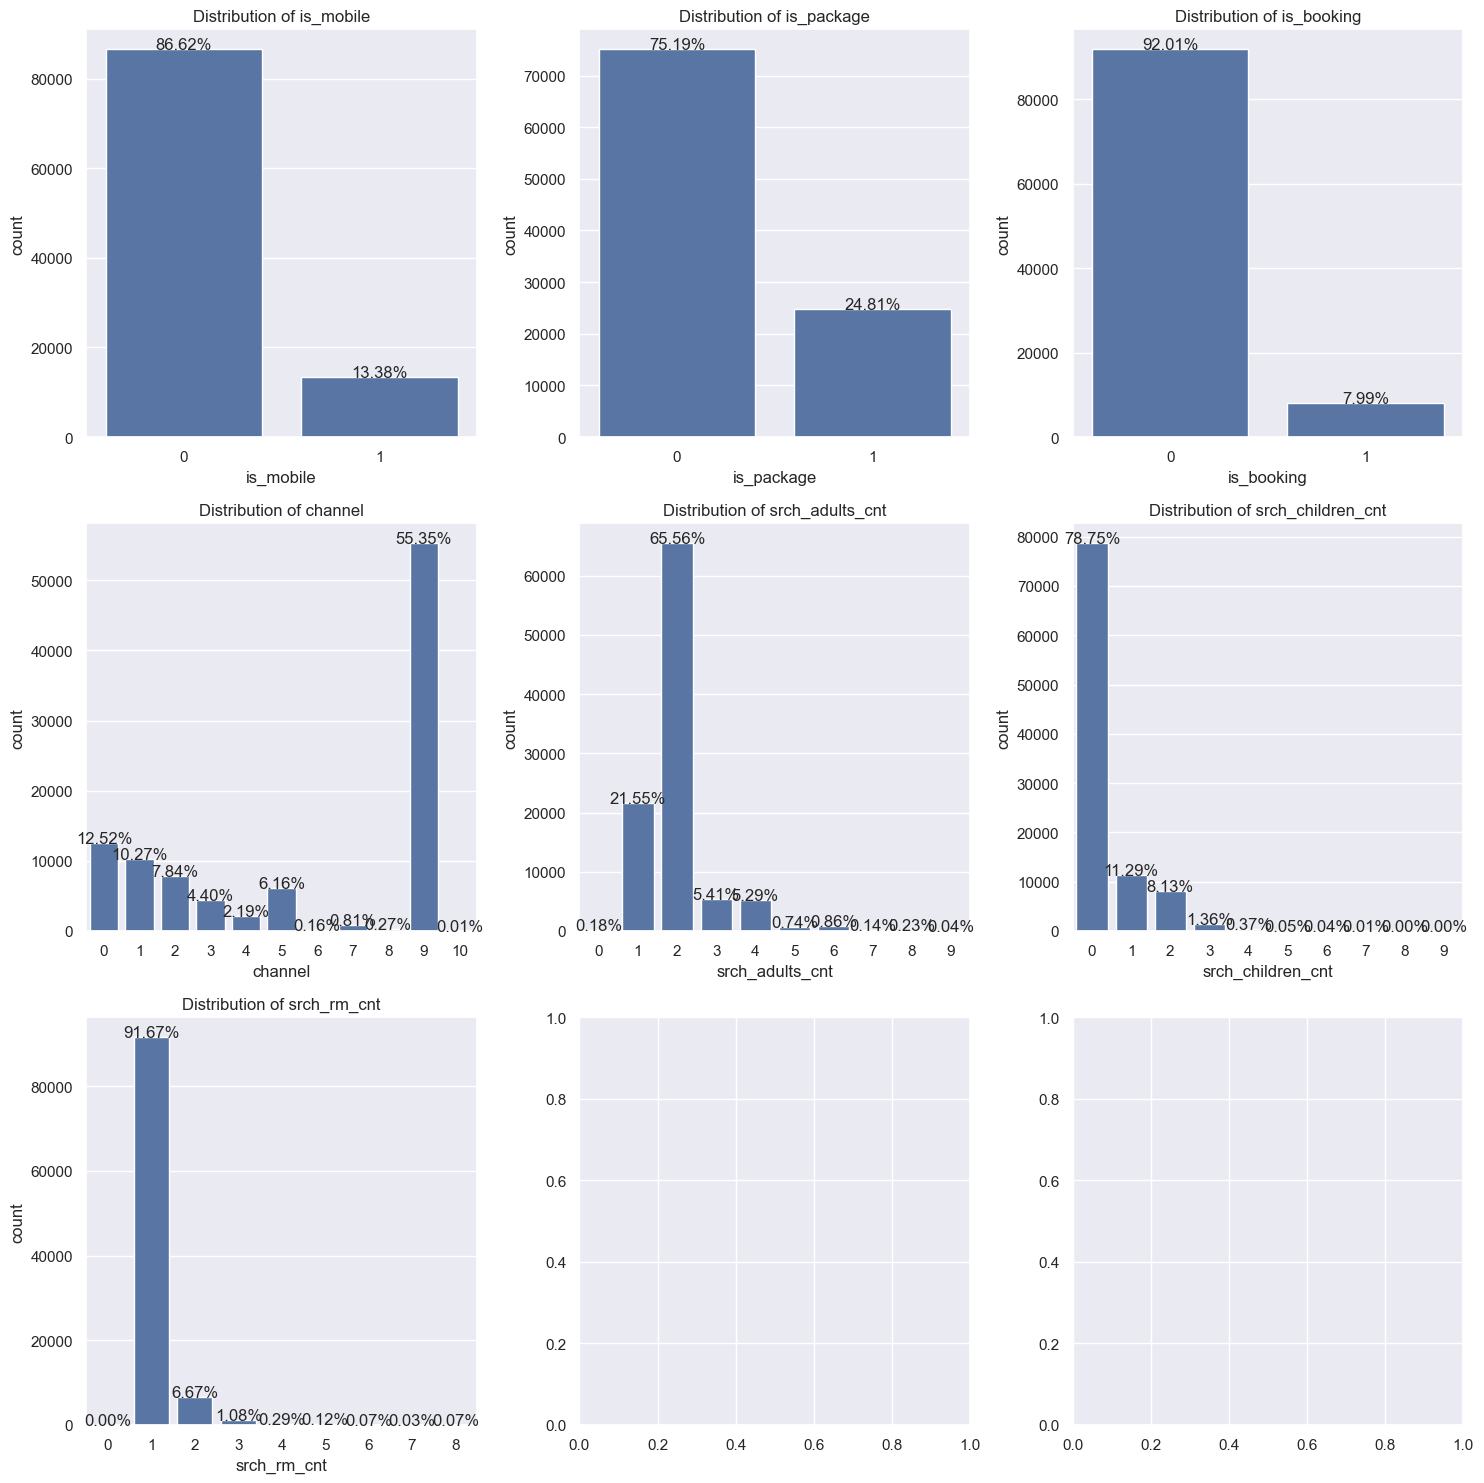

In [149]:
# Set the theme for all plots
sns.set_theme(style="darkgrid")

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# List of variables to plot
variables = ['is_mobile', 'is_package', 'is_booking', 'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

# Plot each variable in the grid
for i, var in enumerate(variables):
    ax = sns.countplot(x=df[var], ax=axs[i//3, i%3])
    ax.set_title(f'Distribution of {var}')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / len(df)), ha='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

• Is_booking: only 8% of the total searched data was converted.

• Is_mobile: only 13% of the searched data were done by mobile apps.

• Is_package: only 25% of the time a package was used in the search.

• Channel: Marketing channel 9 was used the maximum number of times with 55.4%, followed by channel 0 and 1 with only 12.4% and 10.2, respectively.

• Srch_adults_cnts: most of the time the adults count per searched results accounted for not more than 2, with 66% and 22% for 2 adults and 1 adult respectively. Followed by for 3 adults which is around 5% only.

• Srch_children_cnt: No-children = 79%, 1 children = 11%, well this makes sense from the results we got from the adults count. They are mostly young couples with 0 or 1 children.

• Srch_rm_cnt:91.6% of the time the room count was just 1, followed by 2 rooms for just 7%.

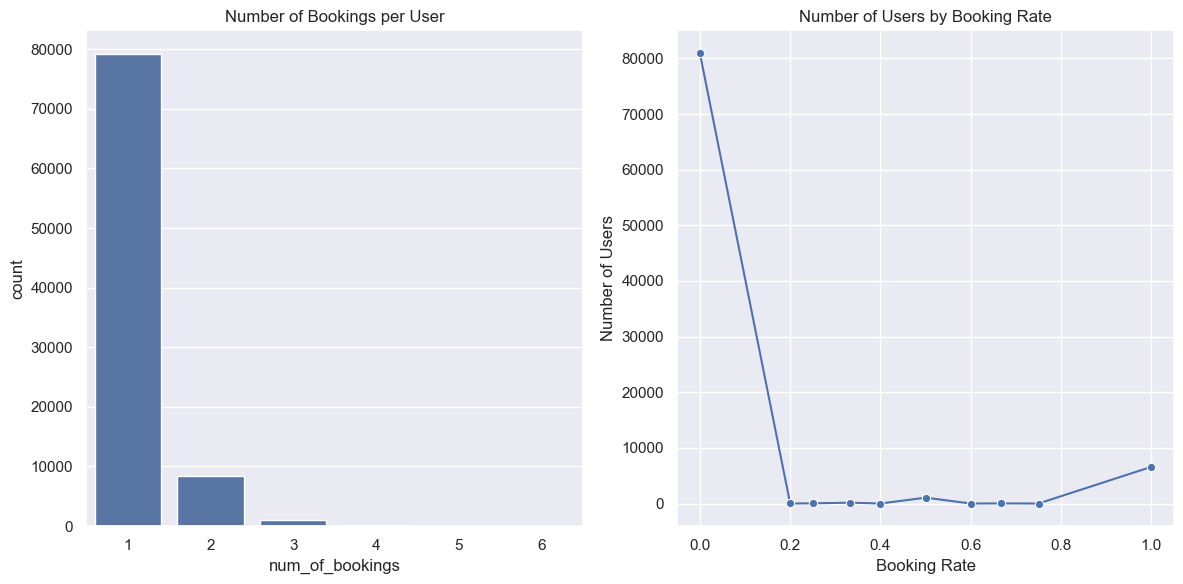

In [150]:
#2 Explore bookings

# Count the number of bookings per user
user_book_count = df.groupby('user_id')['is_booking'].count().reset_index()
user_book_count.rename(columns={'is_booking': 'num_of_bookings'}, inplace=True)

# Calculate the booking rate per user
user_book_rate = df.groupby('user_id')['is_booking'].mean().reset_index()
user_book_rate.rename(columns={'is_booking': 'rate'}, inplace=True)

# Count how many users have each unique booking rate
user_book_rate_count = user_book_rate.groupby('rate')['user_id'].count().reset_index()

# Merge the count of bookings back to the original DataFrame
df = df.merge(user_book_count, on='user_id')

# Create a subplot grid with 1 row and 2 columns
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the count of bookings on the first subplot
sns.countplot(x='num_of_bookings', data=user_book_count, ax=axs[0])
axs[0].set_title('Number of Bookings per User')

# Plot the booking rate line plot on the second subplot
sns.lineplot(x='rate', y='user_id', data=user_book_rate_count, marker='o', ax=axs[1])
axs[1].set_title('Number of Users by Booking Rate')
axs[1].set_xlabel('Booking Rate')
axs[1].set_ylabel('Number of Users')
axs[1].grid(True)

# Show the plots
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()


In [172]:
# Print the result
booking_distribution = user_book_count.groupby('num_of_bookings')['user_id'].count()
print(booking_distribution)

num_of_bookings
1    79189
2     8423
3     1065
4      161
5       24
6        1
Name: user_id, dtype: int64


In [151]:
# check data validation
## check_in date should be later than booking date
## check_out date should be later than check_in date
df['srch_co'] = pd.to_datetime(df['srch_co'])
df['srch_ci'] = pd.to_datetime(df['srch_ci'])
df['date_time'] = pd.to_datetime(df['date_time'])
df['date'] = pd.to_datetime(df['date_time'].apply(lambda x: x.date()))

def duration(row):
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

df['duration'] = df.apply(duration, axis=1)
df['days_in_advance'] = df.apply(days_in_advance, axis=1)
df[['duration','days_in_advance']].describe()

,duration,days_in_advance
count,99496.000000,99853.000000
mean,3.388960,55.258360
std,3.054454,65.714297
min,1.000000,0.000000
25%,1.000000,10.000000
50%,3.000000,31.000000
75%,4.000000,76.000000
max,196.000000,497.000000


Two more features were created.

• Duration : duration of stay [from the features “srch_ci” and “srch_co”]

• Days_in_advance : number of days room searched in advance from the booking date [from features “srch_ci” and “Date_time”]

The numerical features have a lot of extreme/outlier values. Lets impute the values which exceeds 95th percentile, i.e. keep values between [0th – 95th percentile] and impute the exceeding values to the value in the 95th percentile.

In [152]:
def imputer(value,mark):
    if value> mark:
        return mark
    else:
        return value
    
dist_high=df['orig_destination_distance'].quantile(0.95)
dura_high=df['duration'].quantile(0.95)
day_in_advn_high=df['days_in_advance'].quantile(0.95)

df['orig_destination_distance']=df['orig_destination_distance'].apply(lambda x: imputer(x,dist_high))
df['duration']=df['duration'].apply(lambda x: imputer(x,dura_high))
df['days_in_advance']=df['days_in_advance'].apply(lambda x: imputer(x,day_in_advn_high))

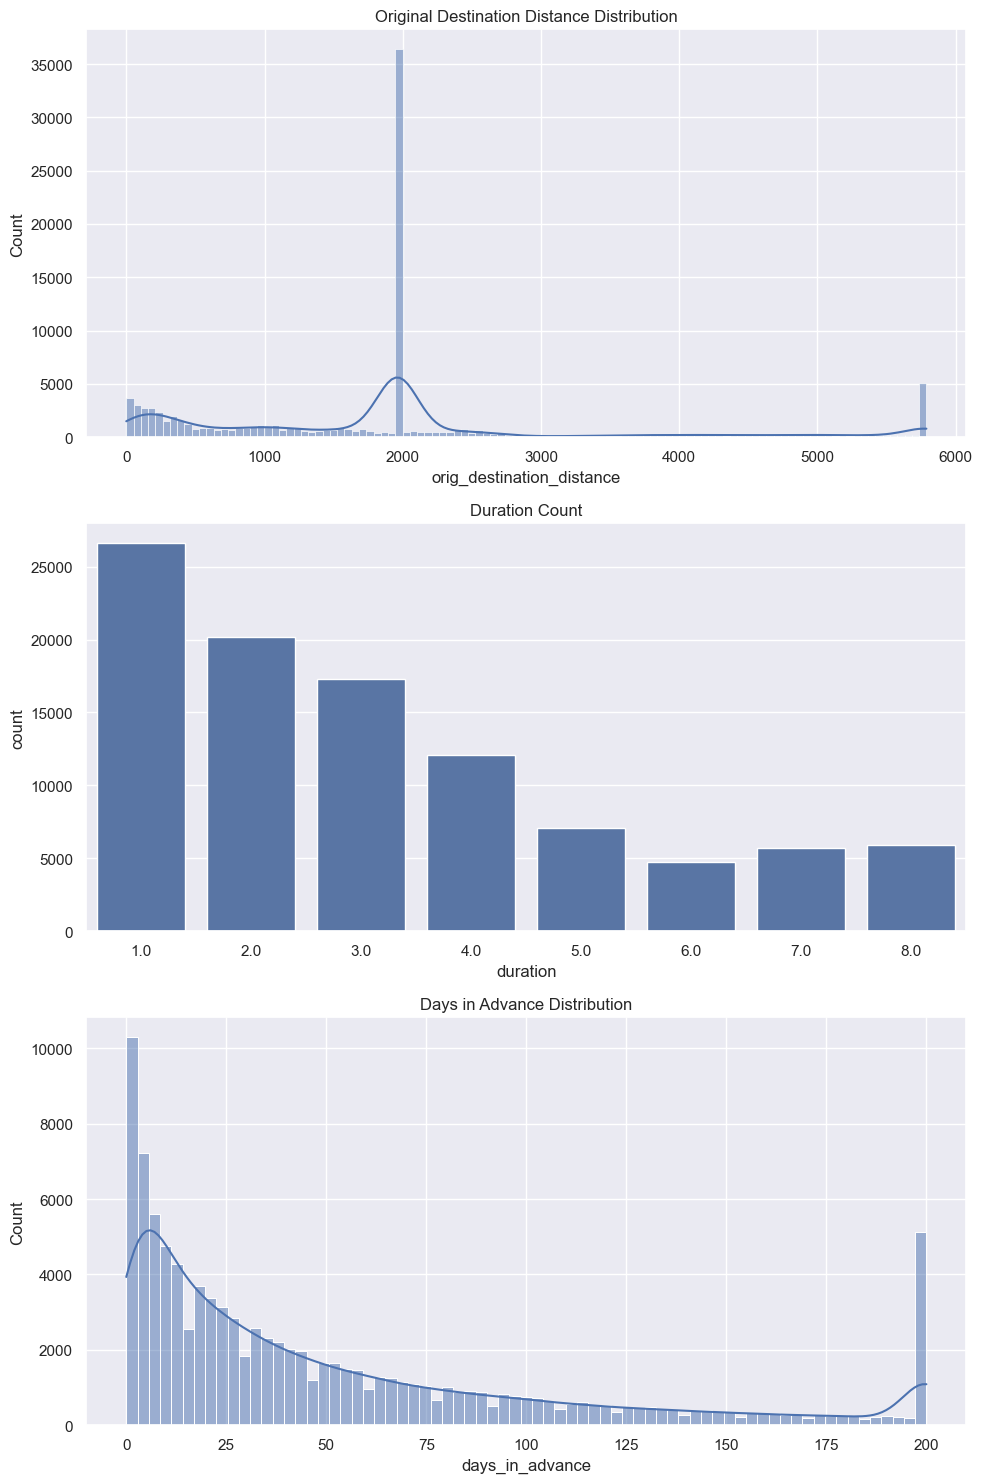

In [153]:
df2 = df.copy()
df2.dropna(inplace=True)

fig, axs = plt.subplots(nrows=3, figsize=(10, 15))  # Adjust figsize if necessary

# Histogram plot for original destination distance
sns.histplot(df2['orig_destination_distance'], kde=True, ax=axs[0])
axs[0].set_title('Original Destination Distance Distribution')

# Count plot for duration
sns.countplot(x='duration', data=df2, ax=axs[1])
axs[1].set_title('Duration Count')

# Histogram plot for days in advance
sns.histplot(df2['days_in_advance'], kde=True, ax=axs[2])
axs[2].set_title('Days in Advance Distribution')

plt.tight_layout()
plt.show()

In [154]:
# channels
## booking rate per channel

# Perform aggregation
channel_stats = df.groupby('channel')['is_booking'].agg(booking_rate_mean='mean', num_of_bookings_sum='sum').reset_index()

# Sort the results
channel_stats_sorted = channel_stats.sort_values(by='booking_rate_mean')

# Print the sorted DataFrame
print(channel_stats_sorted)
print('')

# Calculate and print the mean booking rate for the entire DataFrame
mean_booking_rate = df['is_booking'].mean()
print('Mean booking rate: ', mean_booking_rate)

    channel  booking_rate_mean  num_of_bookings_sum
7         7           0.043157                   35
8         8           0.055351                   15
3         3           0.060400                  266
2         2           0.060490                  474
6         6           0.067901                   11
1         1           0.069690                  716
0         0           0.071948                  901
9         9           0.085381                 4726
5         5           0.094349                  581
4         4           0.120784                  265
10       10           0.200000                    3

Mean booking rate:  0.07993


The mean booking rate is 8%, whereas few channels have lower booking rate than the mean.

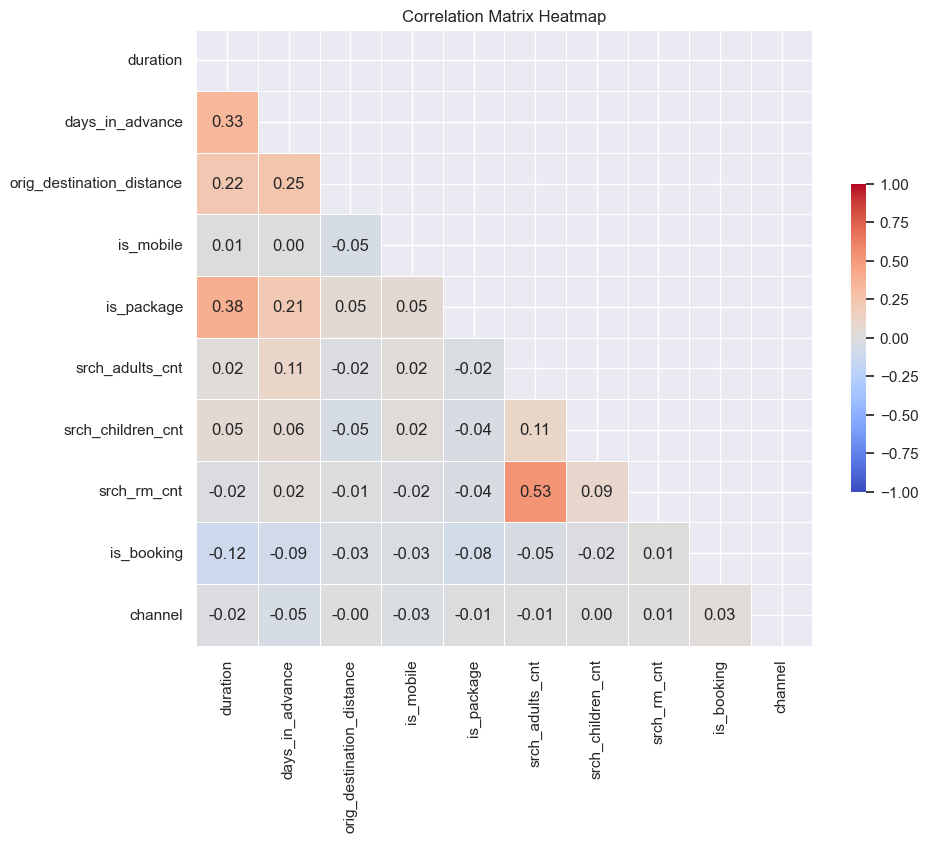

In [155]:
num_list = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt','is_booking','channel']

# Calculate the correlation matrix
corr = df[num_list].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

#### Signifcant Observations
- There is a moderate positive correlation between **duration** and **days_in_advance**. This suggests that longer trips tend to be planned further in advance.

- There is a slight positive correlation between **orig_destination_distance** and **days_in_advance**. This suggests that trips planned further in advance also tend to have longer travel distances.

- There is a slight positive correlation between **is_package** and **duration** and between **is_package** and **days_in_advance**. This suggests that packaged trips tend to be longer and are booked further ahead.

- There is a strong positive correlation between **srch_rm_cnt** and **srch_children_cnt**. This suggests that family or group travel involves booking more rooms.

## CLUSTERS SEGMENTATION

/opt/anaconda3/envs/ai4cm-env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ai4cm-env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ai4cm-env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ai4cm-env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

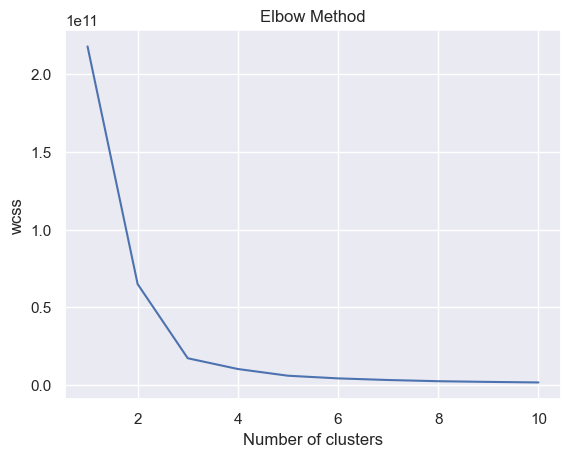

In [156]:
# Select clustering method and number of clusters
# The Elbow method: choose a K so that the sum of the square error of the distances decrease drastically
clusters = range(1,11)
wcss = []
df.dropna(axis=0,inplace=True)

for i in clusters:
    km=KMeans(n_clusters=i)
    km.fit(df[num_list])
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

From the WCSS (Within Cluster Sum of Squares), the first 3 clusters have large distances between them and as we move forward, the value gets minimized. So for this data, the optimal number of clusters is set to 3.

In [157]:
# Standardize the data
X=df[num_list].copy()
for i in num_list:
    X[i] = preprocessing.scale(X[[i]])
    
X.head()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,is_booking,channel
0,0.382516,-0.181730,-0.954110,-0.392492,1.753666,-0.022394,-0.458214,-0.247761,-0.295554,-1.306742
1,-1.037656,-0.927587,-1.105331,-0.392492,-0.570234,-0.022394,-0.458214,-0.247761,-0.295554,0.843256
2,1.802688,2.126874,1.758824,-0.392492,1.753666,-0.022394,-0.458214,-0.247761,-0.295554,0.843256
3,-1.037656,-0.892070,-1.146491,-0.392492,-0.570234,-0.022394,-0.458214,-0.247761,3.383471,-1.575492
4,0.855907,0.031372,0.063232,-0.392492,-0.570234,-0.022394,0.904346,-0.247761,-0.295554,0.843256


/opt/anaconda3/envs/ai4cm-env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


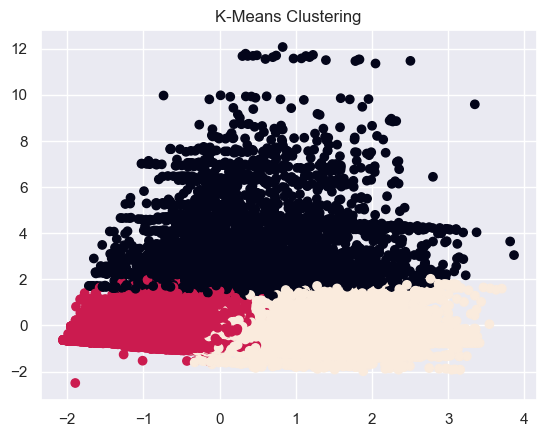

In [158]:
km = KMeans(n_clusters=3, max_iter=300, random_state=None)
X.dropna(axis=0,inplace=True)
km.fit_predict(X)
df['cluster']=km.predict(X)

# use PCA to reduce dimensions and visualize clusters
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(X)
df['x'] = pca.fit_transform(X[num_list])[:, 0]
df['y'] = pca.fit_transform(X[num_list])[:, 1]
plt.scatter(df['x'],df['y'],c=df['cluster'])
plt.title("K-Means Clustering")
plt.show()

In [159]:
df['cluster'].value_counts()

cluster
1    58435
2    34136
0     6900
Name: count, dtype: int64

## PROFILE THE CLUSTERS

In [160]:
# Profile the clusters
df3=df.groupby('cluster')[num_list].mean()
print(df3)

         duration  days_in_advance  orig_destination_distance  is_mobile  \
cluster                                                                    
0        2.998841        57.534203                1802.994265   0.116232   
1        2.129597        30.312244                1540.776534   0.124292   
2        5.049596        88.687280                2438.806630   0.152713   

         is_package  srch_adults_cnt  srch_children_cnt  srch_rm_cnt  \
cluster                                                                
0          0.172029         4.239565           0.639710     2.369420   
1          0.022897         1.824694           0.303945     1.016839   
2          0.641053         1.906814           0.330326     1.020594   

         is_booking   channel  
cluster                        
0          0.077971  6.024783  
1          0.112073  5.958929  
2          0.026482  5.664050  


- Cluster 0 - Short duration stays, Medium amount of planning, Medium travel distances, Medium/low likelihood of booking packages, Highest number of adults, Highest number of children, Highest room count per search, Medium booking conversion rate. 

- Cluster 1 - Longest average stay duration, Books the most in advance,  Longest travel distances, High likelihood of booking packages, Medium number of adults, Medium/low number of children, Medium room count per search, Highest booking conversion rate. 

- Cluster 2 - Shortest duration stays, Least amount of planning, Shortest travel distances, Lowest likelihood of booking packages, Medium number of adults, Lowest number of children, Medium room count per search, Lowest booking conversion rate. 

### FEATURE IMPORTANCE WITH RANDOM FOREST

#### CLUSTER 0

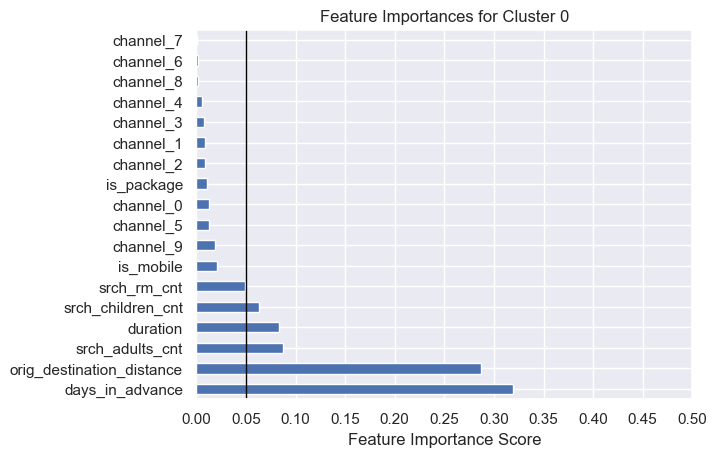

In [161]:
# Filter to cluster 0
cluster_0 = df[df['cluster'] == 0]
cluster_0_new = cluster_0.copy()

# Create dummy variables for the 'channel' column
dummy_channels = pd.get_dummies(cluster_0_new['channel'], prefix='channel')

# Join the dummy variables to the original DataFrame
cluster_0_new = cluster_0_new.join(dummy_channels)

# Define the feature set including dummy variables
features = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 'is_package',
            'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'channel_0','channel_1','channel_2','channel_3','channel_4',
            'channel_5','channel_6','channel_7','channel_8','channel_9']
target = ['is_booking']

# Fit the model before getting feature importances
rf0 = RandomForestClassifier(n_estimators=500, random_state=0)  # Initialize a RandomForestClassifier
rf0.fit(cluster_0_new[features], cluster_0_new[target].values.ravel())  # Fit the model

# Get feature importances
feat_imp = pd.Series(rf0.feature_importances_, index=features)
feat_imp = feat_imp.sort_values(ascending=False)

# Plot the feature importances
feat_imp.plot(kind='barh', title='Feature Importances for Cluster 0', rot=0)
plt.xlabel('Feature Importance Score')
plt.xticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
plt.axvline(x=0.05, ymin=0.0, ymax=1.0, linewidth=1, color='black')
plt.show()

There are 6 features that explains almost 95% of the variance.

We found out that the customers of this cluster travels an average distance of 1800 kms, books their rooms around 2 months in advance and stays 3 days in average.

Also, the probabilities of adults, children and room counts with respect to booking were good. So it makes sense that these features contributes abut 95% variance.

Whereas, the probabilities of mobile and package usage were very low, so they contribute very less.

We can say Cluster 0 mainly consists of families who travels in groups, as can be seen from the number of adults, children and room counts.

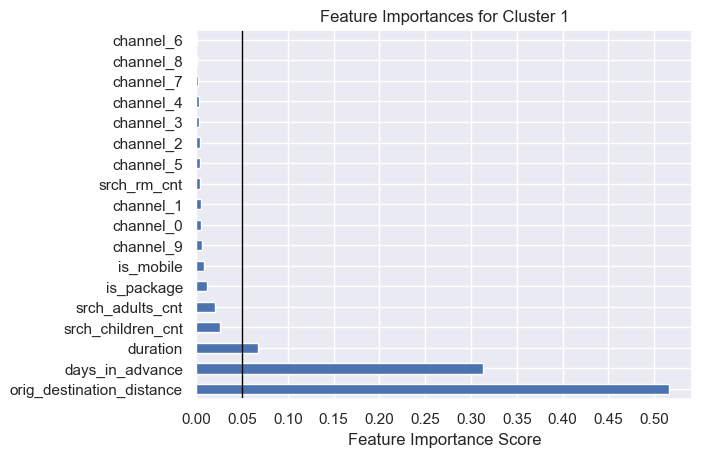

In [162]:
# Filter to cluster 1
cluster_1 = df[df['cluster'] == 1]
cluster_1_new = cluster_1.copy()

dummy_channels = pd.get_dummies(cluster_1_new['channel'], prefix='channel')
cluster_1_new = cluster_1_new.join(dummy_channels)

rf1 = RandomForestClassifier(n_estimators=500, random_state=0) 
rf1.fit(cluster_1_new[features], cluster_1_new[target].values.ravel())  

# Get feature importances
feat_imp = pd.Series(rf1.feature_importances_, index=features)
feat_imp = feat_imp.sort_values(ascending=False)

# Plot the feature importances
feat_imp.plot(kind='barh', title='Feature Importances for Cluster 1', rot=0)
plt.xlabel('Feature Importance Score')
plt.xticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
plt.axvline(x=0.05, ymin=0.0, ymax=1.0, linewidth=1, color='black')
plt.show()


Cluster 1 consists mainly of individuals or couples who prefer short-duration trips, 2 days on average,  typically planned about a month in advance. They tend to book their travel without packages, which suggests a preference for flexibility in arranging travel components. They travel on average 1540 kms. Duration, days in advance and distance from the origin, explain more than 95% of the variance.

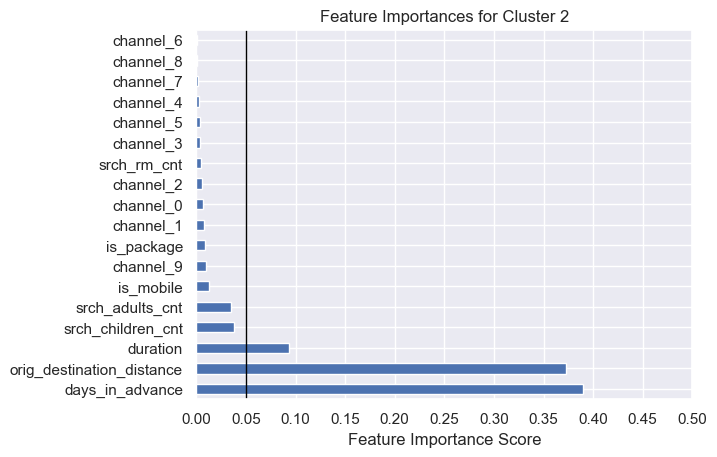

In [165]:
# Filter to cluster 2
cluster_2 = df[df['cluster'] == 2]
cluster_2_new = cluster_2.copy()

dummy_channels = pd.get_dummies(cluster_2_new['channel'], prefix='channel')
cluster_2_new = cluster_2_new.join(dummy_channels)

rf2 = RandomForestClassifier(n_estimators=500, random_state=0) 
rf2.fit(cluster_2_new[features], cluster_2_new[target].values.ravel())  

# Get feature importances
feat_imp = pd.Series(rf2.feature_importances_, index=features)
feat_imp = feat_imp.sort_values(ascending=False)

# Plot the feature importances
feat_imp.plot(kind='barh', title='Feature Importances for Cluster 2', rot=0)
plt.xlabel('Feature Importance Score')
plt.xticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
plt.axvline(x=0.05, ymin=0.0, ymax=1.0, linewidth=1, color='black')
plt.show()

Again, duration, days in advance and distance from the origin, explain more than 95% of the variance.
Cluster 2 is characterized by the longest travel distances, about 2438 kms, planned around 89 days in advance on average, indicating that these travelers plan their trips well ahead, which is common for long travels.
Also, the duration is the longest, with an average of about 5 days, aligning with the need for longer stays after traveling significant distances. This might indicate vacation travel or extended business trips.
The highest usage of package deals among the clusters (64%), indicates a preference for convenience and perhaps all-inclusive offers that simplify planning and logistics for long trips.